# Effect of Literacy Rate on the US Presidential Elections

## Authors: 

* Aiza Usman (au534)
* Ali Shazal (as10505)

## Outline

Hailing from a South Asian country, we have seen that elections results are directly related to the literacy rates of areas. Low literacy rate areas always favour the status-quo, while high literacy areas tend to elect new parties. Due to this observation over the past few years, we were curious to see if the US had similar trends in its election too. We chose the US Presidentail Election 2016 because it has the most detailed data available, down to the counties. Since the vote was mainly divided between The Democratic Party and The Republican Party (GOP), we will only be observing their votes.

We will do a thorough observation on the relation of three education levels - high school graduates, undergraduates, graduates - with the vote division between Democrats and Republicans and see if a directly propotional relation can be established between the two.

## 1. Data and its Source

### 1.1 Election Results

The county-wise election results from the US election 2016 were obtained from [Tony McGovern's Github Repo](https://github.com/tonmcg/US_County_Level_Election_Results_08-16), where he scraped data from [Townhall](https://townhall.com/election/2016/president/) and compiled it into one file. This file contains details about the results of all US counties.

### 1.2 County Data

Details of counties such as literacy rate, population breakdown, etc were obtained from [Emil Kirkegaard's Github Repo](https://github.com/Deleetdk/USA.county.data) who compiled the data set from [The NY Times](https://www.nytimes.com/elections/2016/results/president) and several other sources mentioned in his [paper](https://openpsych.net/paper/12).



## 2. Fetching and Scrubbing Data

### 2.1 Import Packages

We will need the following packages to scrub and analyse our data.

In [1]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2 County-wise Literacy Rate

We are now going to collect the county-wise data. However, the data has many unneccessary columns that need to be scrubbed. We only need the information related to the education levels in the counties, the State they belong to, and the their FIPS codes. We are keeping the FIPS codes column because this will the be needed to merge the data frames with another one. 

In [2]:
#  First we'll clean the literacy data file
url1 = "https://raw.githubusercontent.com/alishazal/Relationship-Between-US-Election-2016-and-Literacy-Rate/master/Data/Literacy_Data.csv"
data1 = pd.read_csv(url1)
col_list1 = ["State", "fips","At.Least.High.School.Diploma", "At.Least.Bachelor.s.Degree", "Graduate.Degree"]
data1 = data1[col_list1]
data1 = data1.sort_values(by=['fips'])
data1.head(5)

,State,fips,At.Least.High.School.Diploma,At.Least.Bachelor.s.Degree,Graduate.Degree
63,Alabama,1001.0,85.3,21.7,7.1
8,Alabama,1003.0,87.6,26.8,8.7
67,Alabama,1005.0,71.9,13.5,6.0
2,Alabama,1007.0,74.5,10.0,2.6
20,Alabama,1009.0,74.7,12.5,4.2


### 2.3 County-wise Election Results

Now we will clean the data for the election results. We only need the columns for the votes for both parties, the total votes in each county, county names and FIPS codes.

In [3]:
# Second we'll clean the other file
url2 = "https://raw.githubusercontent.com/alishazal/Relationship-Between-US-Election-2016-and-Literacy-Rate/master/Data/2016_US_County_Level_Presidential_Results.csv"
data2 = pd.read_csv(url2)
col_list2 = ["votes_dem", "votes_gop", "total_votes", "county_name", "combined_fips"]
data2 = data2[col_list2]
data2 = data2.rename(columns={'combined_fips': 'fips'})
data2.head(5)


,votes_dem,votes_gop,total_votes,county_name,fips
0,93003.0,130413.0,246588.0,Alaska,2013
1,93003.0,130413.0,246588.0,Alaska,2016
2,93003.0,130413.0,246588.0,Alaska,2020
3,93003.0,130413.0,246588.0,Alaska,2050
4,93003.0,130413.0,246588.0,Alaska,2060


### 2.4 Merging Data and Renaming Columns

Now that we have cleaned both data frames, we will be merging them according to the FIPS codes column. We are also renaming the columns for clarity of the information. The newly formed data frame is displayed below. 

In [4]:
# Merging data on fips column
cData = pd.merge(data1, data2, on="fips")
cData
# # Renaming Columns
cData.columns = ['State', 'FIPS Code', 'High School Grad','Undergraduate', "Post Grad", 'Democratic Votes', 'Republican Votes', "Total Votes", "County Name"]

# Display cumulative data
cData.head(5)

,State,FIPS Code,High School Grad,Undergraduate,Post Grad,Democratic Votes,Republican Votes,Total Votes,County Name
0,Alabama,1001.0,85.3,21.7,7.1,5908.0,18110.0,24661.0,Autauga County
1,Alabama,1003.0,87.6,26.8,8.7,18409.0,72780.0,94090.0,Baldwin County
2,Alabama,1005.0,71.9,13.5,6.0,4848.0,5431.0,10390.0,Barbour County
3,Alabama,1007.0,74.5,10.0,2.6,1874.0,6733.0,8748.0,Bibb County
4,Alabama,1009.0,74.7,12.5,4.2,2150.0,22808.0,25384.0,Blount County


### 2.5 Adding New Columns

Since we are observing the vote division between Democrats and Republicans, we are adding a column 'Winner', saying which party won in each county. 

In [5]:
# Add column of winning party
def labelWinner (row):
   if row['Democratic Votes']/row['Republican Votes'] > 1 :
      return 'Democrats'
   return 'Republicans'

cData['Winner'] = cData.apply(lambda row: labelWinner(row),axis=1) 


For convenience, we're putting the county name column as the first one in the dataframe.

In [6]:
# Making county name as first column
cols = cData.columns.tolist()
cols = cols[-2:-1] + cols[:-2] + cols[-1:]
cData = cData[cols]

The scrubbed and final data looks as follows:

In [7]:
cData.head(5)

,County Name,State,FIPS Code,High School Grad,Undergraduate,Post Grad,Democratic Votes,Republican Votes,Total Votes,Winner
0,Autauga County,Alabama,1001.0,85.3,21.7,7.1,5908.0,18110.0,24661.0,Republicans
1,Baldwin County,Alabama,1003.0,87.6,26.8,8.7,18409.0,72780.0,94090.0,Republicans
2,Barbour County,Alabama,1005.0,71.9,13.5,6.0,4848.0,5431.0,10390.0,Republicans
3,Bibb County,Alabama,1007.0,74.5,10.0,2.6,1874.0,6733.0,8748.0,Republicans
4,Blount County,Alabama,1009.0,74.7,12.5,4.2,2150.0,22808.0,25384.0,Republicans


## 3. Analysis

### 3.1 High School Literacy Rate

We would first like to see if there is a trend between Democrats or Republicans winning from a county and the high school graduate percentage of that county. We are particularly interested in knowing if low or high literacy rate consistently favors one party over the other.

For this, we divided the counties by the winner and picked out the high school grad column. We then plot a line graph of each column to see if they are disparate. We are also adding the average lines that display the average literacy rate for each party won county.

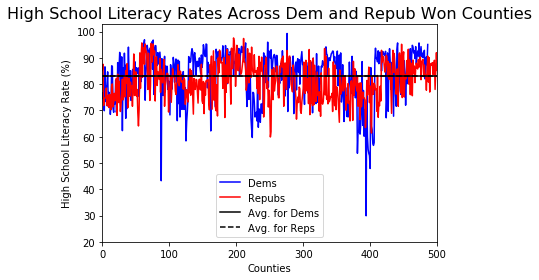

In [8]:
repubs = cData.loc[cData['Winner'] == 'Republicans'].reset_index()["High School Grad"]
hRepMean = repubs.mean()
dems = cData.loc[cData['Winner'] == 'Democrats'].reset_index()["High School Grad"]
hDemMean = dems.mean()

combined = pd.DataFrame({'Dems': dems, 'Repubs': repubs}).plot.line(color=["b", "r"])
plt.title("High School Literacy Rates Across Dem and Repub Won Counties", loc="center", fontsize="16")
combined.set_ylabel('High School Literacy Rate (%)')
combined.set_xlabel('Counties')
combined.set_ylim(ymin=20)
combined.set_xlim(xmin=0)
combined.set_xlim(xmax=500)

combined.axhline(hDemMean, color='k', linestyle='-', label='Avg. for Dems')
combined.axhline(hRepMean, color='k', linestyle='--', label='Avg. for Reps')
combined.legend()

#### Observation
The mean high school grad literacy rates of Democrat-won areas and Republican-won areas does not show any relation. In fact, they are overalapping as can be seen in the graph above. So, we can discard this data and move on to the next education level - undergrad - to see if we can find any relation there.

### 3.2 Undergraduate Literacy Rate

Now, we would like to see if there is a trend in the election results and the undergrad literacy rate. Again, we're interested in seeing if there is a relation between a certain party winning and the percentage of undergraduates from those counties. We want to know if higher education favors a certain party.

We will again plot the percentage undergraduates of Democrat and Republican won counties as seperate lines to visualize and compare them. We will also superimpose the graph with average undergrad literacy rate for both parties.

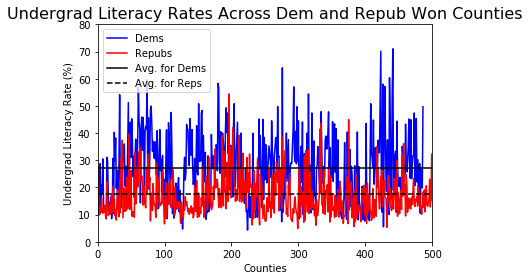

In [9]:
uRepubs = cData.loc[cData['Winner'] == 'Republicans'].reset_index()["Undergraduate"]
uRepMean = uRepubs.mean()
uDems = cData.loc[cData['Winner'] == 'Democrats'].reset_index()["Undergraduate"]
uDemMean = uDems.mean()

combined = pd.DataFrame({'Dems': uDems, 'Repubs': uRepubs}).plot.line(color=["b", "r"])
plt.title("Undergrad Literacy Rates Across Dem and Repub Won Counties", loc="center", fontsize="16")
combined.set_ylabel('Undergrad Literacy Rate (%)')
combined.set_xlabel('Counties')
combined.set_ylim(ymin=0)
combined.set_ylim(ymax=80)
combined.set_xlim(xmin=0)
combined.set_xlim(xmax=500)

combined.axhline(uDemMean, color='k', linestyle='-', label='Avg. for Dems')
combined.axhline(uRepMean, color='k', linestyle='--', label='Avg. for Reps')
combined.legend()

#### Observation

The results show that counties won by Democrats have a significantly higher percentage of undergraduates. To further visualize the difference, let's look at the bar graph below: 

Text(0,0.5,'Avg. Undergrad Literacy Rate (%)')

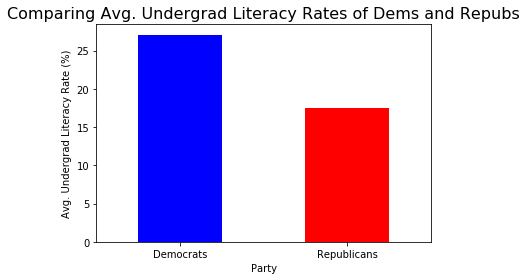

In [10]:
uMeans = []
uMeans.append(uDemMean)
uMeans.append(uRepMean)
tempDf = pd.DataFrame({'Party':['Democrats', 'Republicans'], 'Avg. Literacy Rate':uMeans})
pBar = tempDf.plot.bar(x='Party', y='Avg. Literacy Rate', rot=0, color=["b", "r"])
plt.title("Comparing Avg. Undergrad Literacy Rates of Dems and Repubs", loc="center", fontsize="16")
pBar.get_legend().remove()
pBar.set_ylabel('Avg. Undergrad Literacy Rate (%)')

#### Observation

Thus, the Democrat-won counties had a much higher percentage of undergraduates.

### 3.3 Post Grad Literacy Rate

Further, we would like to see if the same trend continues as we move towards higher levels of education. We will now analyse the post-grad literacy rates of counties and their relationship with the election outcome

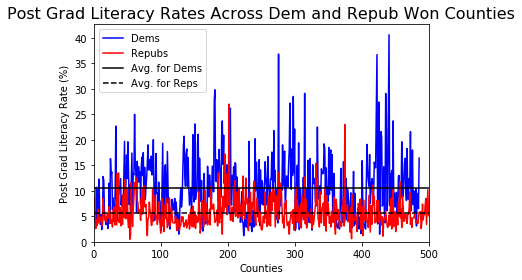

In [11]:
pRepubs = cData.loc[cData['Winner'] == 'Republicans'].reset_index()["Post Grad"]
pDems = cData.loc[cData['Winner'] == 'Democrats'].reset_index()["Post Grad"]

combined = pd.DataFrame({'Dems': pDems, 'Repubs': pRepubs}).plot.line(color=["b", "r"])
plt.title("Post Grad Literacy Rates Across Dem and Repub Won Counties", loc="center", fontsize="16")
combined.set_ylabel('Post Grad Literacy Rate (%)')
combined.set_xlabel('Counties')
combined.set_ylim(ymin=0)
combined.set_xlim(xmin=0)
combined.set_xlim(xmax=500)

pRepMean = pRepubs.mean()
pDemMean = pDems.mean()
combined.axhline(pDemMean, color='k', linestyle='-', label='Avg. for Dems')
combined.axhline(pRepMean, color='k', linestyle='--', label='Avg. for Reps')
combined.legend()

#### Observation

This graph shows a much greater difference between literacy rates. We can see that counties won by Democrats have almost double the percentage of post-grad literacy rate. The following bar graph makes it even clearer: 

Text(0,0.5,'Avg. Literacy Rate (%)')

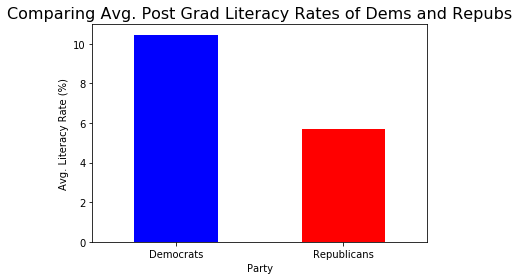

In [12]:
pMeans = []
pMeans.append(pDemMean)
pMeans.append(pRepMean)
tempDf = pd.DataFrame({'Party':['Democrats', 'Republicans'], 'Avg. Literacy Rate':pMeans})
pBar = tempDf.plot.bar(x='Party', y='Avg. Literacy Rate', rot=0, color=["b", "r"])
plt.title("Comparing Avg. Post Grad Literacy Rates of Dems and Repubs", loc="center", fontsize="16")
pBar.get_legend().remove()
pBar.set_ylabel('Avg. Literacy Rate (%)')

#### Observation

Again, the greater literacy rate has favored the Democrats.

### 3.4 Comparing Literacy Rates of the Strongest Red State & Blue State - Texas & California

To see if we can observe the same relation between the strongest Red (Republicans) State and Blue (Democrats) State, we first plot a horizontal bar graph to figure out the strongest Blue State.

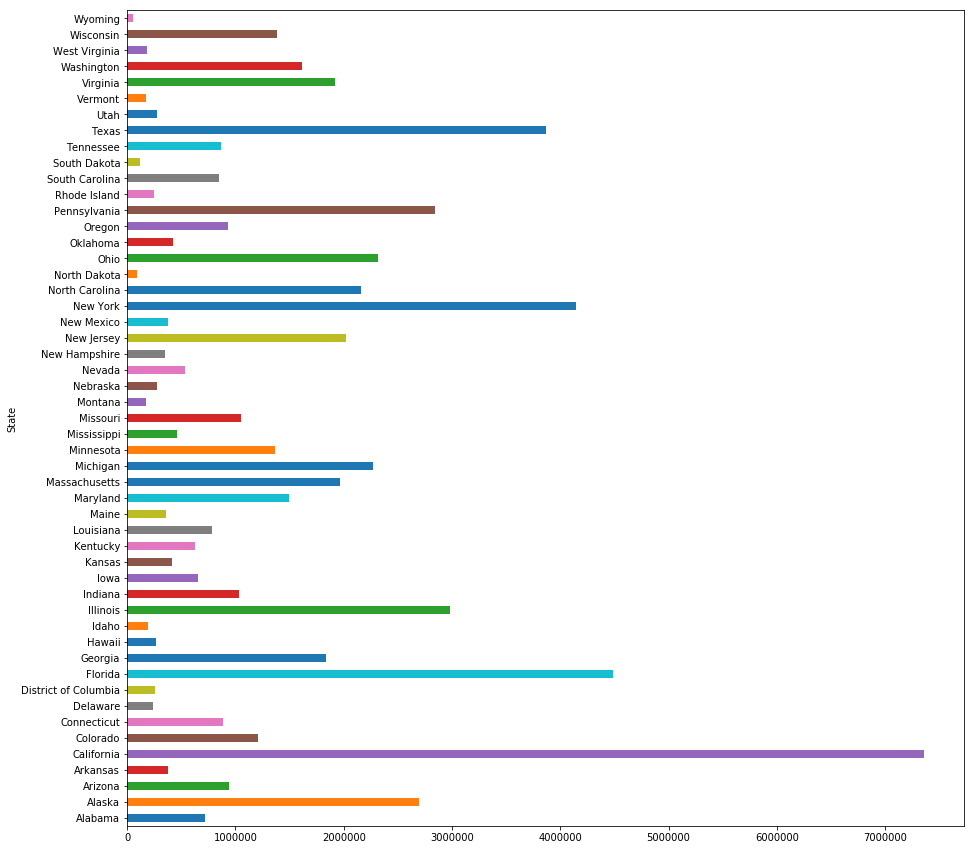

In [13]:
# Check which is the strongest democrat won state
dSumVotes = cData.groupby(['State'])['Democratic Votes'].agg('sum')
dSumVotes.plot.barh(figsize = (15,15))

#### Observation
California is the strongest blue state with over 7000000 votes for the Democrats. 

We repeat the process to figure out the strongest red state.

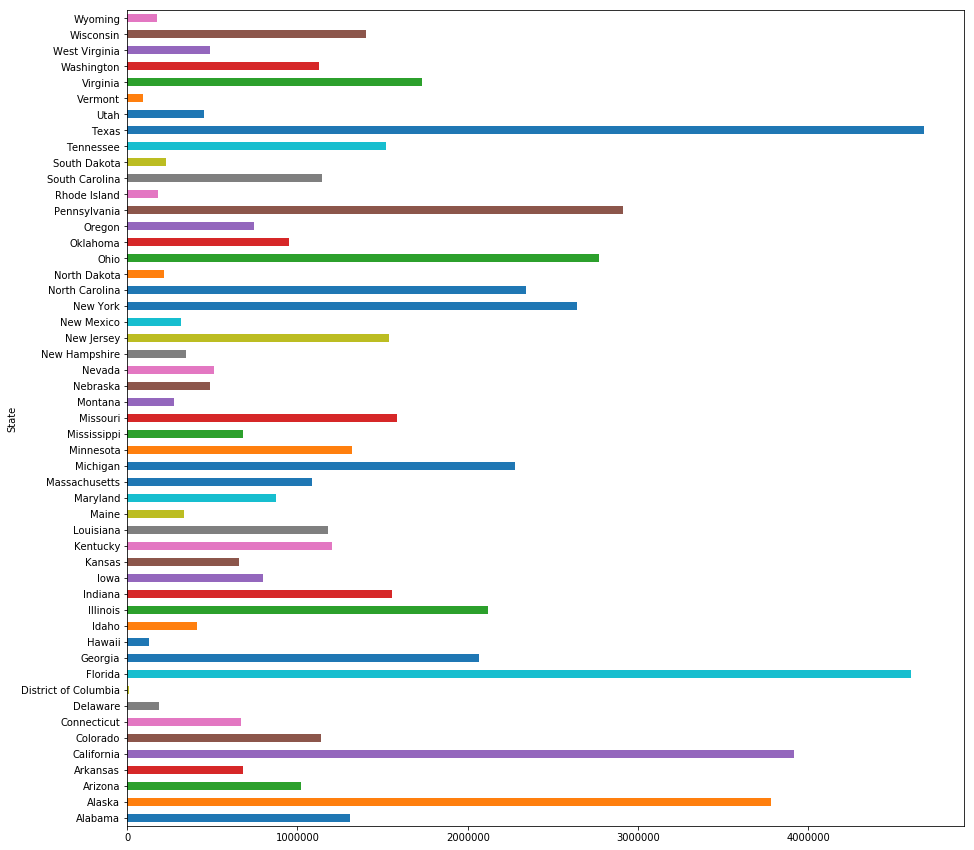

In [14]:
# Check which is the strongest republican won state
rSumVotes = cData.groupby(['State'])['Republican Votes'].agg('sum')
rSumVotes.plot.barh(figsize = (15,15))

#### Observation

Texas is the strongest red state with over 3000000 votes for the Republicans. 

#### Comparing the literacy rates

We will now compare the average undergrad and post-grad literacy rates of the two states by plotting a bar graph. 

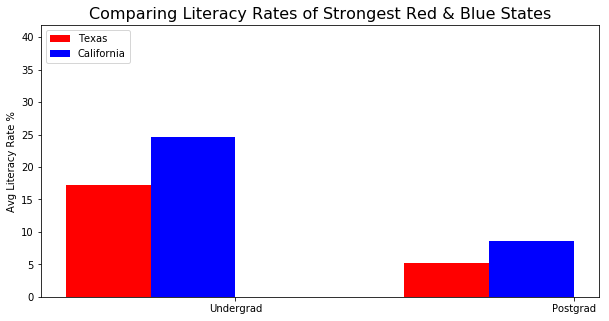

In [15]:
blue = cData.loc[cData['State'] == 'California']
red = cData.loc[cData['State'] == 'Texas']
uR = red["Undergraduate"].mean()
pR = red["Post Grad"].mean()
uB = blue["Undergraduate"].mean()
pB = blue["Post Grad"].mean()
repsList = []
repsList.append(uR)
repsList.append(pR)
demsList = []
demsList.append(uB)
demsList.append(pB)
strongest = pd.DataFrame({"Education": ["Undergrad", "Postgrad"], 'Republicans': repsList, 'Democrats': demsList})

pos = list(range(len(strongest['Republicans']))) 
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,
        strongest['Republicans'], 
        # of width
        width, 
        # with color
        color='r',
        label=strongest['Education'][0]) 


plt.bar([p + width for p in pos],
        strongest['Democrats'],
        # of width
        width,
        # with color
        color='blue',
        label=strongest['Education'][1])

ax.set_ylabel('Avg Literacy Rate %')
ax.set_title('Comparing Literacy Rates of Strongest Red & Blue States', fontsize="16")
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(strongest['Education'])
plt.ylim([0, max(strongest['Republicans'] + strongest['Democrats'])] )
plt.legend(['Texas', 'California'], loc='upper left')
plt.show()

#### Observation

As can be seen from the graph above, the average literacy rate of both undergrads and post-grads is higher in the strongest Blue State (California). 

### 3.5 Most Swing States - Michigan and Minnesota

According to the [Washington Post](https://www.washingtonpost.com/graphics/politics/2016-election/swing-state-margins/), two of the closest-fought swing states were Michigan and Minnesota. We would like to see if literacy rate was a reason why these states were so closely fought. We will use the undergrad literacy rate for this.

Text(0.5,1,'Comparing Avg. Undergrad Literacy Rates of Most Swing States')

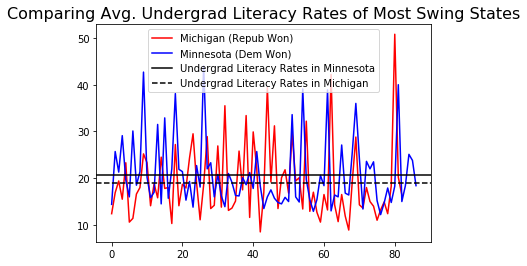

In [16]:
michigan = cData.loc[cData['State'] == 'Michigan'].reset_index()["Undergraduate"]
minnesota = cData.loc[cData['State'] == 'Minnesota'].reset_index()["Undergraduate"]
combined = pd.DataFrame({'Michigan (Repub Won)': michigan, 'Minnesota (Dem Won)': minnesota}).plot.line(color=["r", "b"])
michMean = michigan.mean()
minnMean = minnesota.mean()
combined.axhline(minnMean, color='k', linestyle='-', label='Undergrad Literacy Rates in Minnesota')
combined.axhline(michMean, color='k', linestyle='--', label='Undergrad Literacy Rates in Michigan')
combined.legend()
plt.title("Comparing Avg. Undergrad Literacy Rates of Most Swing States", loc="center", fontsize="16")

#### Observation

We can see that it is indeed true that literacy rate has a very narrow margin between the two parties and that has contributed to the states being swing states. On top of that, the literacy rate of Democrat won state is still higher, which supports the trend we have seen previously.

## 4. Conclusion

We can conclude from our analysis that there does exist a directly proportional relationship between literacy rates and the elections results of counties. Moreover, as the education levels increased, this relation got amplified.

Thus, our analysis showed that both the higher percentage of literacy rate and higher levels of education went in favor of the Democrats. It was clear that in the counties that were won by the Republicans, the literacy rate and the level of education were lower than the counties won by the Democrats.

## 5. Sources

* Literacy Rate: https://github.com/Deleetdk/USA.county.data
* Election Results 2016: https://github.com/tonmcg/US_County_Level_Election_Results_08-16

## 6. GitHub Repository

https://github.com/alishazal/Relationship-Between-US-Election-2016-and-Literacy-Rate